# Análise Ensaio Aeropêndulo

**Sistema em malha aberta com sinal de entrada sendo uma onda quadrada**

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import control as ct
import scipy.signal as sg
from control.matlab import *
import scienceplots

%config InlineBackend.figure_format='retina'
plt.style.use(["science", "notebook"])

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

**Importando as bibliotecas usadas para a análise**

In [27]:
# arquivo_15_6_2023_23_10_43.csv
file = "../interface_aeropendulo/interface/dados_de_ensaio/arquivo_15_6_2023_23_27_9.csv"
dados_malha_aberta = pd.read_csv(file, header=None, sep=',').values
dados_malha_aberta

array([[        nan, 0.00000e+00, 1.00000e+00, ..., 4.00000e+00,
        5.00000e+00, 6.00000e+00],
       [0.00000e+00, 0.00000e+00, 2.25490e+01, ..., 1.50000e+00,
        1.50000e+00, 7.37057e+02],
       [1.00000e+00, 0.00000e+00, 2.26150e+01, ..., 1.50000e+00,
        1.50000e+00, 7.37077e+02],
       ...,
       [1.04800e+03, 0.00000e+00, 4.12090e+01, ..., 1.50000e+00,
        1.50000e+00, 7.58037e+02],
       [1.04900e+03, 0.00000e+00, 4.12090e+01, ..., 1.50000e+00,
        1.50000e+00, 7.58057e+02],
       [1.05000e+03, 0.00000e+00, 4.08130e+01, ..., 1.50000e+00,
        1.50000e+00, 7.58077e+02]])

In [28]:
dados_malha_aberta[0][0] = 0.0

In [32]:
dados_malha_aberta[1]

array([  0.   ,   0.   ,  22.549,   0.   ,   0.   ,   1.5  ,   1.5  ,
       737.057])

**Obtendo os sinais do ensaio**

In [34]:
tempo = np.array(dados_malha_aberta[:,7])
sinal_entrada  = np.array(dados_malha_aberta[:,6])
sinal_saida = np.array(dados_malha_aberta[:,2])
sinal_controle = np.array(dados_malha_aberta[:,4])


## Plotagem dos sinais

###  **Sinais de Entrada e de Saída**


Periodo de Amostragem: 0.02


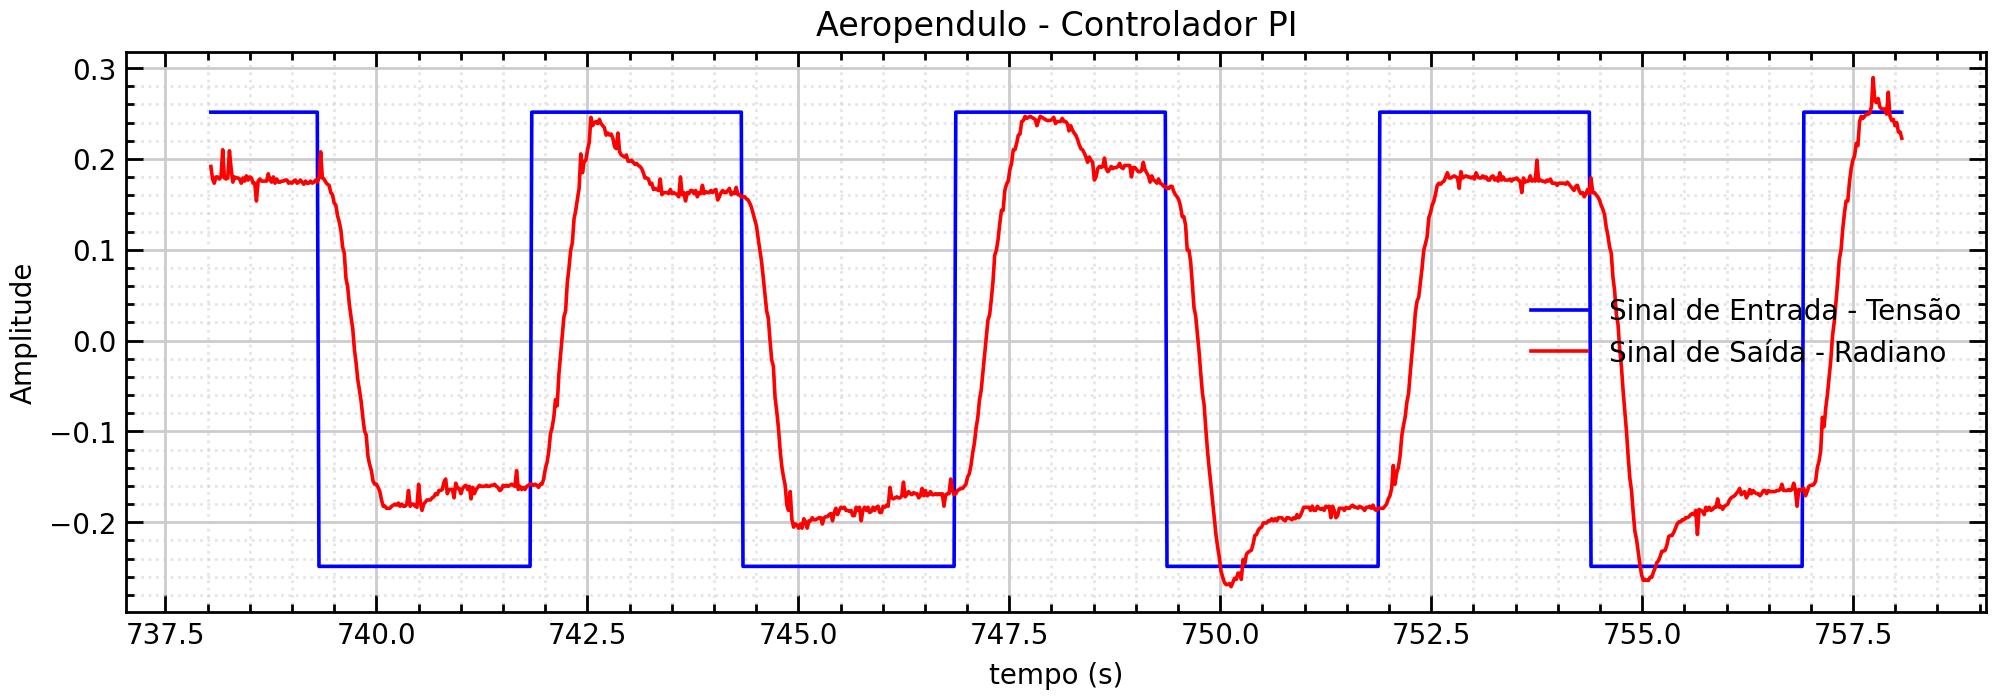

In [40]:
Ts = 0.02
print('\nPeriodo de Amostragem:', Ts)


plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(tempo[50:], sinal_entrada[50:] - np.mean(sinal_entrada[50:]),
         c = 'b', lw=1.3, label = "Sinal de Entrada - Tensão")
plt.plot(tempo[50:], np.deg2rad(sinal_saida[50:]) - np.mean(np.deg2rad(sinal_saida[50:])),
         c = 'r', lw=1.3, label = "Sinal de Saída - Radiano")

plt. title('Aeropendulo - Controlador PI', fontsize=12)
plt.ylabel('Amplitude', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10)

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()